###### 1. Problem statement

###### 1.1 introduction
We are proposing a system that helps the user to predict the price of an airline ticket 

###### 1.2 Dataset features
* `Airline`: The name of the airline company.
* `Date_of_Journey`: The date of the journey.
* `Source`:The source from which the service begins.
* `Destination `:The destination where the service endss.
* `Route`: The route taken by the flight to reach the destination.
* `Dep_Time`: The time when the journey starts from the source.
* `Arrival_Time`: Time of arrival at the destination.
* `Duration`:Total duration of the flight.
* `Total_Stops`:  Total stops between the source and destination.
* `Additional_Info`: Additional information about the flight.
* **`Price`**: The price of the ticket.

###### 2.importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

###### 3.Data Wrangling
here, we'd load our data from the CSV file, and dive deeper into it to check for any required cleaning steps.

In [2]:
# loading data and viewing its first 5 rows
df= pd.read_csv("Train set.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,9/06/2019,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,5644
1,Vistara,6/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,08:45,09:25 07 Mar,24h 40m,1 stop,No info,12395
2,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,4077
3,Vistara,12/06/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,23:25,6h 25m,1 stop,No info,8610
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067


In [3]:
# viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


* `Route` column wouldn't be so useful during analysis
* `Date_of_Journey` column needs to be casted into date time 
* `Duration` and `Total_Stops` need to be organized and casted into integers

In [4]:
# check for missing values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* our data has 2 missing values one in the 'Route' and one int the 'Total_Stops' column

In [5]:
# check for duplicated rows
df.duplicated().sum()

125

* our dataset has 125 duplicated rows.

In [6]:
# exploring summary statistics
df.describe()

,Price
count,8012.000000
mean,9094.237269
std,4571.794408
min,1759.000000
25%,5351.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


* it looks the price column has outliers

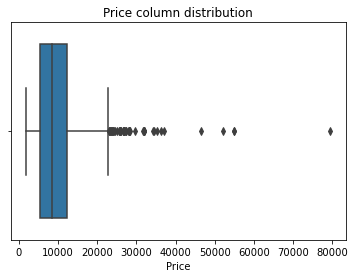

In [7]:
# exploring the price column
sns.boxplot(x= 'Price', data=df)
plt.title("Price column distribution")
plt.show()

* the price column has outliers that needs to be handeled

###### Exploration Summarey
* we have a dataframe consisting of 8012 rows and 11 columns.
* our dataset has 2 NANs and 125 duplicated rows which we'll drop.
* `Date_of_Journey` column needs to be casted into date time to extract the month and day of the journy
* `Route` wouldn't be so useful during analysis, so we'll drop them.
* `Duration` and `Total_Stops` are not in an appropriate form which we need to convert into integer.
* `Duration`and `Price` column has obvious ouliers
* `Dep_Time` and `Arrival_Time` are not in an appropriate form which we need to convert into integer.

###### 4.cleaning

###### Drooping misssing values

In [8]:
# dropping NANs 
df.dropna(inplace=True)

# confirming
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

###### Dropping duplcated rows

In [9]:
# dropping duplicates
df.drop_duplicates(inplace=True)

# confirming
df.duplicated().sum()

0

###### Dropping  `Route` column

In [10]:
# dropping Route column 
df.drop('Route', axis = 1, inplace = True)

# confirming changes
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

###### Casting `Release_Date` column and extracing year , month and day values

In [11]:
# casting column
df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey'])

# confirming changes
print(df['Date_of_Journey'].dtypes)

datetime64[ns]


In [12]:
# extracting the year valus
years= df['Date_of_Journey'].dt.year

# getting the years' unique values
years.unique()

array([2019], dtype=int64)

* All of our data is in 2019. So, We wolud just keep the month and day values

In [13]:
# extracting the month values
df['Journey_month'] = df['Date_of_Journey'].dt.month

# confirm changes
df['Journey_month'].dtypes

dtype('int64')

In [14]:
# extracting the day values
df['Journey_day'] = df['Date_of_Journey'].dt.day

# confirm changes
df['Journey_day'].dtypes

dtype('int64')

In [15]:
# Now we can drop the Date_of_journey column
df.drop('Date_of_Journey',axis=1,inplace=True)

# confirming
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_month',
       'Journey_day'],
      dtype='object')

###### Organizing  `Total_Stops` column


In [16]:
# here, values are assigned to the correspondeing keys
df.replace({'Total_Stops' :{'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}}, inplace=True)

In [17]:
# casting the column into integer
df['Total_Stops']= df['Total_Stops'].astype('int')

# confirming 
df['Total_Stops'].dtypes

dtype('int32')

###### Organizing  `Duration` column
for this columns, we will combine the hours and munites values into one which would be and integer representing the duration in munites 

In [18]:
# combine the hours and munites values into one
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# confirming
df['Duration'].dtypes

dtype('int64')

######  `Dep_Time` and `Arrival_Time`
* for these columns we need extract hour and munite values and create separate columns for each

In [19]:
# the Arrival_Time column

# Removing the attached date
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time column
df.drop(["Arrival_Time"], axis = 1, inplace = True)

we'd do the same with the Dep_Time column

In [20]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time column
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
# confirming
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Kolkata,Banglore,150,0,No info,5644,9,6,16,55,14,25
1,Vistara,Mumbai,Hyderabad,1480,1,No info,12395,6,3,9,25,8,45
2,IndiGo,Banglore,Delhi,165,0,No info,4077,3,4,8,50,6,5
3,Vistara,Kolkata,Banglore,385,1,No info,8610,12,6,23,25,17,0
4,IndiGo,Banglore,New Delhi,175,0,No info,10067,1,3,13,0,10,5


###### Handeling the `Duration` column outliers

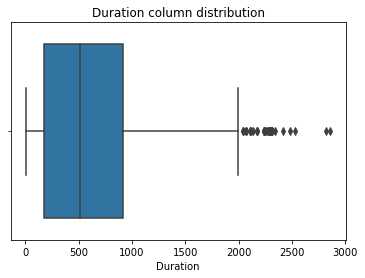

In [22]:
# exploring the column
sns.boxplot(x= 'Duration', data=df)
plt.title("Duration column distribution")
plt.show()

* all the outliers are high outliers
* the upper bound is approximately 2000

In [23]:
# calculating the uuper bound
Q1, Q3= np.percentile(df['Duration'],[25,75])
IQR= Q3 - Q1
max= Q3 + (1.5 * IQR)
max

2037.5

In [24]:
# counting the number of outliers
df[df['Duration']>2037.5].shape

(60, 13)

* the outliers are only 60 so we can drop them

In [25]:
# dropping outliers
df= df[df['Duration'] <= 2037.5]

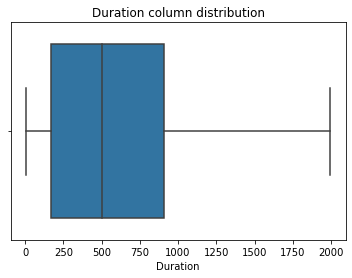

In [26]:
# confirming changes
sns.boxplot(x= 'Duration', data=df)
plt.title("Duration column distribution")
plt.show()

###### Handeling the `Price` column outliers
same as we've done with duration column

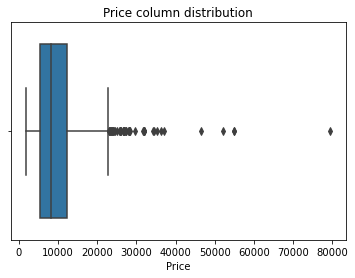

In [27]:
# exploring the column
sns.boxplot(x= 'Price', data=df)
plt.title("Price column distribution")
plt.show()

* all the outliers are hight outliers
* the upper bound is approximately 22000

In [28]:
# calculating the uuper bound
Q1, Q3= np.percentile(df['Price'],[25,75])
IQR= Q3 - Q1
max= Q3 + (1.5 * IQR)
max

22862.0

In [29]:
# counting the number of outliers
df[df['Price']>22862.0].shape

(73, 13)

In [30]:
# dropping outliers
df= df[df['Price']<=22862.0]

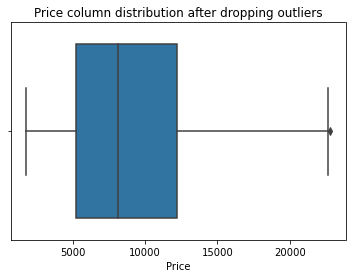

In [31]:
# confirming changes
sns.boxplot(x= 'Price', data=df)
plt.title("Price column distribution after dropping outliers")
plt.show()

###### `Additional_Info`

In [32]:
df['Additional_Info'].replace({'No Info':'No info'},inplace = True)

###### confirming changes

In [33]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Kolkata,Banglore,150,0,No info,5644,9,6,16,55,14,25
1,Vistara,Mumbai,Hyderabad,1480,1,No info,12395,6,3,9,25,8,45
2,IndiGo,Banglore,Delhi,165,0,No info,4077,3,4,8,50,6,5
3,Vistara,Kolkata,Banglore,385,1,No info,8610,12,6,23,25,17,0
4,IndiGo,Banglore,New Delhi,175,0,No info,10067,1,3,13,0,10,5


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7753 entries, 0 to 8011
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          7753 non-null   object
 1   Source           7753 non-null   object
 2   Destination      7753 non-null   object
 3   Duration         7753 non-null   int64 
 4   Total_Stops      7753 non-null   int32 
 5   Additional_Info  7753 non-null   object
 6   Price            7753 non-null   int64 
 7   Journey_month    7753 non-null   int64 
 8   Journey_day      7753 non-null   int64 
 9   Arrival_hour     7753 non-null   int64 
 10  Arrival_min      7753 non-null   int64 
 11  Dep_hour         7753 non-null   int64 
 12  Dep_min          7753 non-null   int64 
dtypes: int32(1), int64(8), object(4)
memory usage: 817.7+ KB


In [35]:
df.nunique()

Airline              11
Source                5
Destination           6
Duration            337
Total_Stops           5
Additional_Info       6
Price              1579
Journey_month         7
Journey_day           9
Arrival_hour         24
Arrival_min          12
Dep_hour             24
Dep_min              12
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 13 columns and 7753  rows to dig into during our analysis

###### 5.Data Vigualization
here, we'd use Matplotlib and seaborn for making some informative visuals to gain insights abut our data.

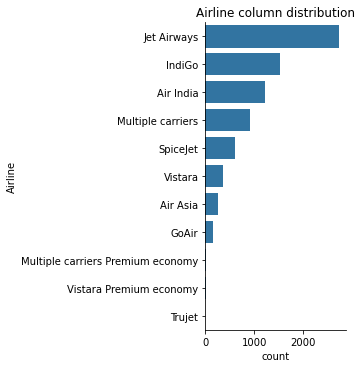

In [36]:
# visualizing Airline column
sns.catplot(y = 'Airline', data = df, kind = 'count', 
            order = df['Airline'].value_counts().index,
            color = 'tab:blue')
plt.title('Airline column distribution')
plt.show()

* it looks like the Jet Airways is the most popular Airline

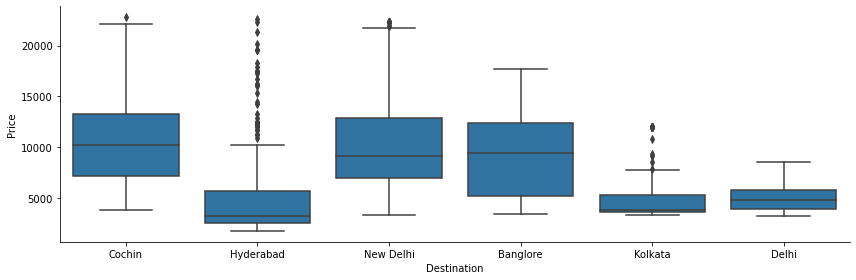

In [37]:
# Destination VS Price
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False),
            kind="box", height = 4, aspect = 3, color='tab:blue')
plt.title('Destination VS Price')
plt.show()

* Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.

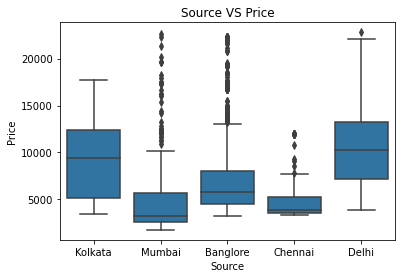

In [58]:
# Source VS Price
sns.boxplot(x='Source', y='Price', data= df, color='tab:blue')
plt.title('Source VS Price')
plt.show()

* Kolkata and Delhi are expensive Sources

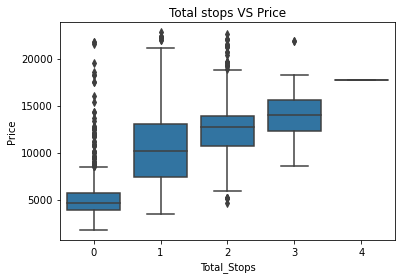

In [40]:
# Total_Stops VS Price
sns.boxplot(x='Total_Stops', y='Price', data= df, color='tab:blue')
plt.title('Total stops VS Price')
plt.show()

* the more the stops are the more the price gets

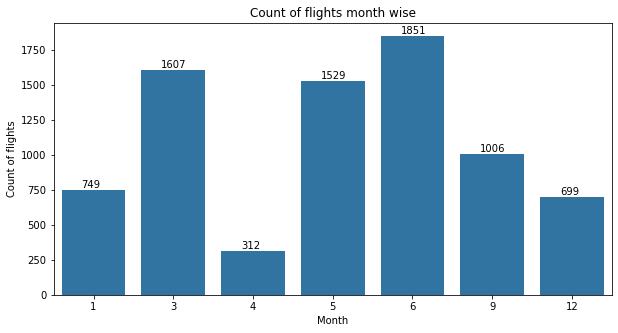

In [41]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df, color='tab:blue')
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

* Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that <b>June </b>has the most number of flights and <b>April</b> has the least.

###### 6.Data Preprocessing

In [42]:
# Encoding the Airline column
airlines = list(df['Airline'].value_counts().index)
airlines_map = {k: v for v, k in enumerate(airlines)}
df['Airline'] = df['Airline'].map(airlines_map)
df['Airline']

0       1
1       5
2       1
3       5
4       1
       ..
8007    1
8008    1
8009    6
8010    4
8011    2
Name: Airline, Length: 7753, dtype: int64

for this column we need extract:
- 'In-flight meal not included'  
- 'No check-in baggage included' 

In [43]:
df['Included Meal'] = df['Additional_Info'].apply(lambda x: 0 if x == 'In-flight meal not included' else 1)
df['Included Baggage'] = df['Additional_Info'].apply(lambda x: 0 if x == 'No check-in baggage included' else 1)
df = df.drop('Additional_Info', axis=1)

the next step is encode the `Source` and `Destination` columns

In [44]:
onc = OneHotEncoder(handle_unknown = 'ignore')
cats = pd.DataFrame(onc.fit_transform(df[['Source', 'Destination']]).toarray())

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7748,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7750,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7751,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


we are going to initialize a function to measure the model metrics

In [45]:
def performance(model,x_train,y_train,y_pred,y_test):
    print('Training Score:',model.score(x_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MAE:',mean_absolute_error(y_test,y_pred))

###### 7.Dataset Splitting
here, We would split our data to features and trget

In [46]:
# features
x = df.drop(['Price', 'Source', 'Destination'],axis = 1)
x.join(cats)

# target
y = df['Price']

# scaling the features data
scaler = StandardScaler()
scaler.fit(x)
x_new = scaler.transform(x)

spliting the data to 80% for the train and 20% for the test

In [47]:
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=0,shuffle = False)

###### 8. Modeling and Parameter Optimization

###### 8.1 LinearRegression model 

In [48]:
#Fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)

#The predicted data
lr_pred =lr.predict(x_test)

In [49]:
performance(lr,x_train,y_train,lr_pred,y_test)

Training Score: 0.5241373936898959
Testing Score: 0.5029213598835564
Other Metrics In Testing Data: 
MAE: 2166.2578646233683


* it looks like the LinearRegression model won't be so helpful

###### 8.2 DecisionTreeRegressor

In [50]:
#Fitting the model
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

#The predicted data
dt_pred = dt.predict(x_test)

#The performance
performance(dt,x_train,y_train,dt_pred,y_test)

Training Score: 0.9961116373350328
Testing Score: 0.812804771398902
Other Metrics In Testing Data: 
MAE: 795.8304319793682


* much better but we still need more

###### 8.3 RandomForestRegressor

In [51]:
#Fitting the model
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

#The predicted data
rf_pred = rf.predict(x_test)

#The performance
performance(rf,x_train,y_train,rf_pred,y_test)

Training Score: 0.9846778615896038
Testing Score: 0.8941017318490116
Other Metrics In Testing Data: 
MAE: 712.5329141132705


* the results seems to be good

###### 8.4 XGBRegressor

In [52]:
#Fitting the model
xgb = XGBRegressor(n_estimators = 300, max_depth = 7, learning_rate = 0.2)
xgb.fit(x_train,y_train)

#The predicted data
xgb_pred = xgb.predict(x_test)

#The performance
performance(xgb,x_train,y_train,xgb_pred,y_test)

Training Score: 0.9930106056632323
Testing Score: 0.9021223639923736
Other Metrics In Testing Data: 
MAE: 737.7443092095322


* the results are so close to the RandomForestRegressor

###### xgboost hyperparameter tuning

Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
Best Params: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1}
Training Score: 0.9816417957053961
Testing Score: 0.9018575295286212
Other Metrics In Testing Data: 
MAE: 764.9200993531139


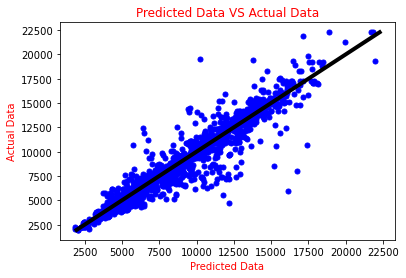

In [53]:
#Randomized search
params = {
         'max_depth': list(range(5,15)),'n_estimators': [300,400,500,600,700],'learning_rate': [0.01,0.1,0.2,0.9]
         }
rand_search = RandomizedSearchCV(XGBRegressor(),params,cv=10,n_jobs=-1)

#Fitting the model
rand_search.fit(x_train,y_train)

#The best estimator
print('Best Estimator:',rand_search.best_estimator_)

#The best parameters
print('Best Params:',rand_search.best_params_)

#The predicted data
rand_pred = rand_search.predict(x_test)

#Decision tree performance after tuning
performance(rand_search,x_train,y_train,rand_pred,y_test)

#Plotting the results
plt.scatter(rand_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=4)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()

###### 8.4 Ensambling RandomForestRegressor and XGBRegressor

In [54]:
predictions = np.mean(np.array([xgb_pred, rf_pred]),axis=0)
print('MAE:',mean_absolute_error(y_test,predictions))

MAE: 686.8795911742469


* the best results we got

###### Preparing the test data for the model

In [64]:
#Applying all the cleaning steps on the test data

def cleaning(df):
    # dropping columns 
    df.drop(['Route'], axis = 1, inplace = True)
    df.dropna(inplace=True)
    # casting column
    df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.day
    df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.month
    df.drop(["Date_of_Journey"],axis = 1, inplace = True)
    df.replace({'Total_Stops' :{'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}}, inplace=True)
    df['Total_Stops'].fillna(0)
    # casting the column into integer
    df['Total_Stops']= df['Total_Stops'].astype('int')
    
    # combine the hours and munites values into one
    df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

    df['Additional_Info'].replace({'No Info':'No info'},inplace = True)
    df['Included Meal'] = df['Additional_Info'].apply(lambda x: 0 if x == 'In-flight meal not included' else 1)
    df['Included Baggage'] = df['Additional_Info'].apply(lambda x: 0 if x == 'No check-in baggage included' else 1)
    df = df.drop('Additional_Info', axis=1)
    #clean Arrival_Time
    df['Arrival_time']=df['Arrival_Time'].str.split(' ').str[0]

    # Extracting Hours
    df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

    # Extracting Minutes
    df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

    # Now we can drop Dep_Time as it is of no use
    df.drop(["Dep_Time"], axis = 1, inplace = True)
    # Extracting Hours
    df["Arrival_hour"] = pd.to_datetime(df.Arrival_time).dt.hour

    # Extracting Minutes
    df["Arrival_min"] = pd.to_datetime(df.Arrival_time).dt.minute

    # Now we can drop Arrival_Time as it is of no use
    df.drop(["Arrival_Time"], axis = 1, inplace = True)
    return df

In [65]:
# Reading the test data
df2=pd.read_csv('Test set.csv')

In [66]:
# Cleaning the test data
df2= cleaning(df2)

In [72]:
# Encoding the Airline column
df2['Airline'] = df2['Airline'].map(airlines_map)

# Encoding the Source and Destination columns
cats2 = pd.DataFrame(onc.transform(df2[['Source', 'Destination']]).toarray())

In [70]:
# Preparing the test data for the model
x2 = df2.drop(['Source', 'Destination','Arrival_time'],axis = 1)
x2_new = scaler.transform(x2)

###### 9.Results

In [74]:
# the model prediction
xgb_tpred = xgb.predict(x2_new)

In [95]:
# creating a dataframe of the predictions
answer = pd.DataFrame(xgb_tpred ,columns=['Price'])

# renamong the index column
answer.index.name='id'

In [91]:
# saving our predictions in a csv file
answer.to_csv('pred.csv')

###### Final summary

* we first explored the data and selected some problems to deal with before modeling
* we then went throw some data cleaning:
1. Dropping missing values and duplicated rows
2. some columns were in inappropriate form. So, We organised them
3. dropped outliers from the `Duration` and `Price` columns 
4. casted the columns into the right data types
5. Dropped the unuseful columns
after the cleaning phase we lost about 259 row and 1 column
* then it was the time for the preprocessing:
1. encoded categorical data
2. scaled numerical data
after the preprocessing the data became in the format that the model would understand
* after that we moved to th model selection phase:
1. we evaluated different models and XGBRegressor gave us the best results
* then it was the time for preparing the test data for the model:
1. we applied all cleaning the steps on it
2. we encoded the categorical columns
3. we scaled the numerical columns
* then we got the model prediction and saved it in a csv file

###### Feature Work

* if we had more time we could have used ANN model to enhance our predictions and score